Diego Yael Islas Santoyo

# A11-Integración Montecarlo

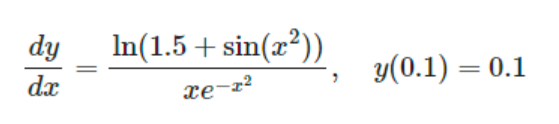

y(x) es la acumulación de todos sus cambios instantáneos.

a) Integra los siguientes intervalos utilizando 1 millón de muestras. Escribe los resultados en un DataFrame de pandas.

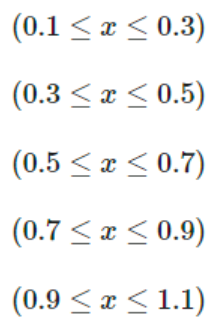

b) Usa el teorema fundamental del cálculo para escribir la secuencia de valores para y(x):

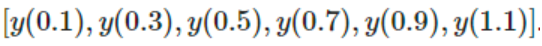


Toma en cuenta que 

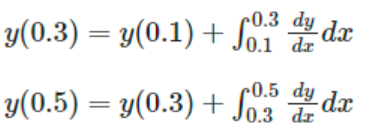

y así sucesivamente.

In [67]:
import numpy as np
import pandas as pd
def ec1(x):
    return (np.log(1.5 + np.sin(x**2))/ x * np.exp(-x**2))

In [65]:
def montecarlo_tipo1(f, a, b, n):
    u = np.random.uniform(a, b, n) 
    return np.mean(f(u)) * (b - a)  

x_valores = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
y0 = 0.1  
n = 1000000  

y_valor = [y0]


for i in range(len(x_valores) - 1):
    a = x_valores[i]        
    b = x_valores[i + 1]    

    integral = montecarlo_tipo1(ec1, a, b, n)

    y2 = y_valor[-1] + integral
    y_valor.append(y2)

df_resultados = pd.DataFrame({
    'x': x_valores,
    'y(x)': y_valor
})

print(df_resultados)


     x      y(x)
0  0.1  0.100000
1  0.3  0.554626
2  0.5  0.774429
3  0.7  0.918736
4  0.9  1.016780
5  1.1  1.079722


In [69]:

for i in range(len(x_valores) - 1):
    a = x_valores[i]        # Límite inferior
    b = x_valores[i + 1]    # Límite superior

    integral = montecarlo_tipo1(ec1, a, b, n)

    y2 = y_valor[-1] + integral
    y_valor.append(y2)

for i in range(len(x_valores)):
    x = x_valores[i]
    y = y_valor[i]
    print("x =", x, "y =", y)


x = 0.1 y = 0.1
x = 0.3 y = 0.5546258888894551
x = 0.5 y = 0.7744294285607176
x = 0.7 y = 0.9187361194500987
x = 0.9 y = 1.0167797517617136
x = 1.1 y = 1.0797215504241744


2.- Dadas superficies en el espacio 

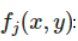

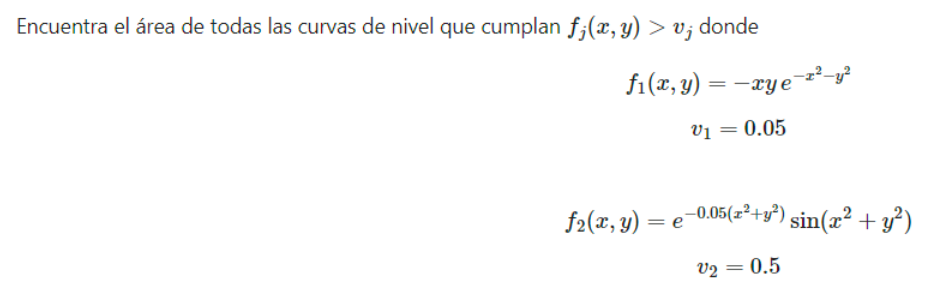

a) Encuentra los límites de integración que encierren el área deseada y grafica.

In [95]:
def fun_1(x,y):
    return (-x)*y*np.exp(-x**2-y**2) > 0.05

def fun_2(x,y):
    return np.exp(-0.05*(x**2-y**2))*np.sin(x**2 + y**2) > 0.5

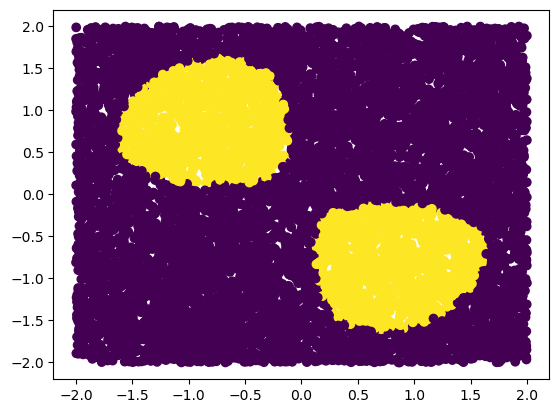

In [97]:
ax = -2
bx = 2
ay = -2
by = 2
n = 10000
x = np.random.uniform(ax, bx, n)
y = np.random.uniform(ay, by, n)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, c = fun_1(x,y))

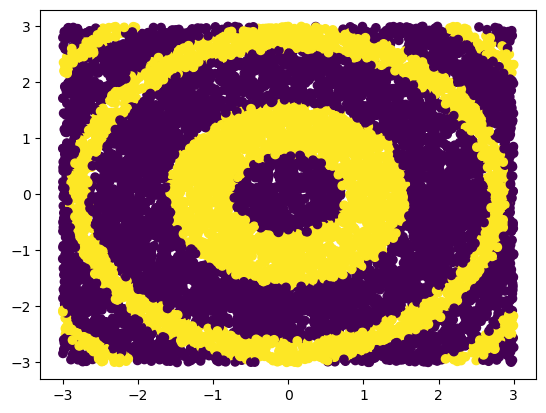

In [123]:
ax2 = -3
bx2 = 3
ay2 = -3
by2 = 3
n = 10000
x = np.random.uniform(ax2, bx2, n)
y = np.random.uniform(ay2, by2, n)

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y, c = fun_2(x,y))


b) Estima los valores de las áreas usando:

+ 10,000 puntos

+ 100,000 puntos

+ 1'000,000 puntos

Escribe tus resultados en un DataFrame de pandas.

In [115]:
def montecarlo_tipo2(fun_1, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y = np.random.uniform(ay, by, n)
    AR = (bx - ax)*(by - ay)
    return fun_1(x, y).mean()*AR

montecarlo_tipo2(fun_1, -2, 2, -2, 2, 10000)
montecarlo_tipo2(fun_1, -2, 2, -2, 2, 100000)
montecarlo_tipo2(fun_1, -2, 2, -2, 2, 1000000)


3.678048

In [117]:
N = np.logspace(1, 7, 7)
tabla = pd.DataFrame(columns = ["10,000", "100,000", "1'000,000"], index = N)

for n in N:
    tabla.loc[n, "10,000"] = montecarlo_tipo2(fun_1, -2, 2, -2, 2, 10000)
    tabla.loc[n, "100,000"] = montecarlo_tipo2(fun_1, -2, 2, -2, 2, 100000)
    tabla.loc[n, "1´000,000"] = montecarlo_tipo2(fun_1, -2, 2, -2, 2, 1000000)
tabla

,"10,000","100,000","1'000,000","1´000,000"
10.0,3.7296,3.70688,NaN,3.681504
100.0,3.6016,3.68352,NaN,3.676528
1000.0,3.7408,3.6944,NaN,3.677840
10000.0,3.792,3.65968,NaN,3.669680
100000.0,3.752,3.67216,NaN,3.684192
1000000.0,3.6992,3.67536,NaN,3.671776
10000000.0,3.744,3.68304,NaN,3.674880


c) Aproxima el error relativo para cada una de tus estimaciones.